# Aerofit - Descriptive Statistics and Probability

#### Importing the required libraries 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Importing the dataset

In [2]:
df = pd.read_csv('aerofit_treadmill.txt')

In [3]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


### Checking the structure & characteristics of the dataset

In [4]:
#length of data
len(df)

180

In [5]:
df.shape

(180, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [7]:
df.isna().sum() # Checking for the missing values

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [8]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [9]:
#checking dtypes
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [10]:
df.Product.unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

In [11]:
df.Education.unique() 
# creating a new categorical column based on existing column i.e. Education

array([14, 15, 12, 13, 16, 18, 20, 21], dtype=int64)

In [12]:
bins = [11, 13, 17, 22]
labels = ["High school", "Bachelor", "Master"]
df["Education_category"] = pd.cut(df['Education'], bins = bins, labels = labels)
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Education_category
0,KP281,18,Male,14,Single,3,4,29562,112,Bachelor
1,KP281,19,Male,15,Single,2,3,31836,75,Bachelor
2,KP281,19,Female,14,Partnered,4,3,30699,66,Bachelor
3,KP281,19,Male,12,Single,3,3,32973,85,High school
4,KP281,20,Male,13,Partnered,4,2,35247,47,High school


In [13]:
df.dtypes

Product                 object
Age                      int64
Gender                  object
Education                int64
MaritalStatus           object
Usage                    int64
Fitness                  int64
Income                   int64
Miles                    int64
Education_category    category
dtype: object

### Detecting Outliers

In [14]:
df['Miles'].describe()

count    180.000000
mean     103.194444
std       51.863605
min       21.000000
25%       66.000000
50%       94.000000
75%      114.750000
max      360.000000
Name: Miles, dtype: float64

<Axes: xlabel='Miles'>

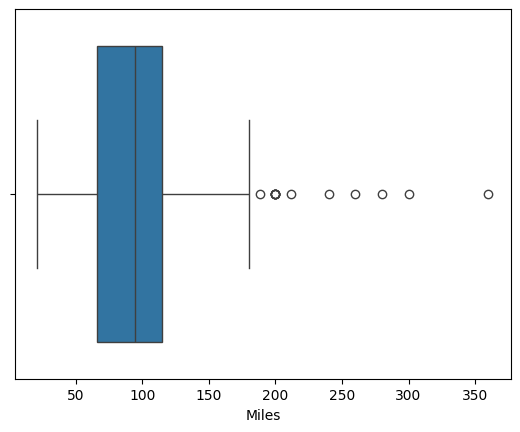

In [15]:
sns.boxplot(data = df['Miles'], orient = "h")

<Axes: xlabel='Age'>

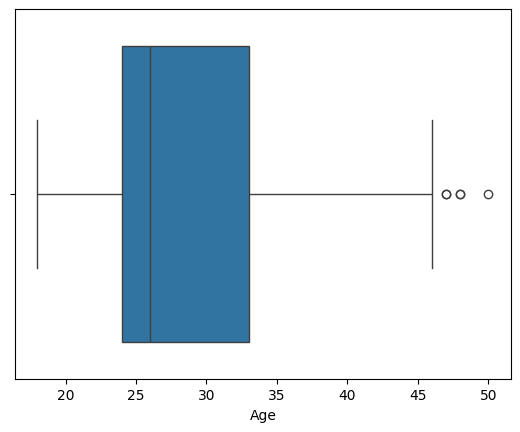

In [16]:
sns.boxplot(data = df['Age'], orient = "h")

<Axes: xlabel='Usage'>

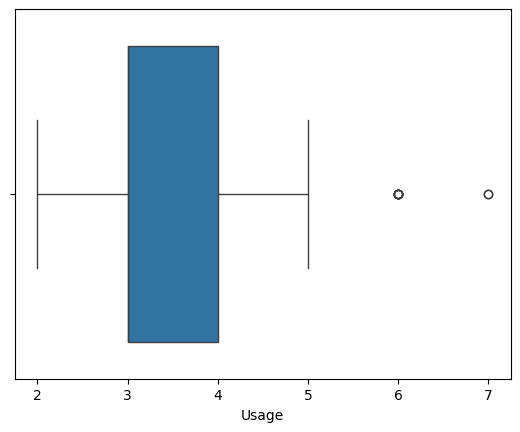

In [17]:
sns.boxplot(data = df['Usage'], orient = "h")

<Axes: xlabel='Fitness'>

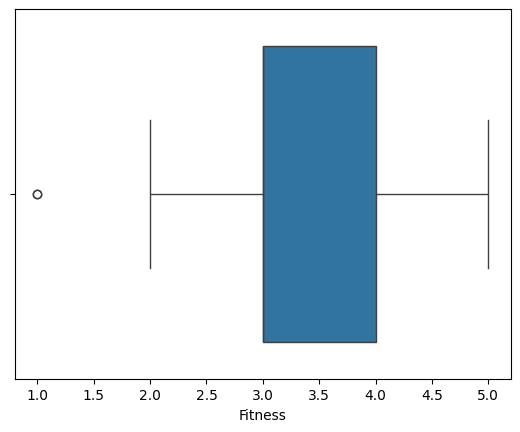

In [18]:
sns.boxplot(data = df['Fitness'], orient = "h")

In [19]:
df['Income'].describe()

count       180.000000
mean      53719.577778
std       16506.684226
min       29562.000000
25%       44058.750000
50%       50596.500000
75%       58668.000000
max      104581.000000
Name: Income, dtype: float64

<Axes: xlabel='Income'>

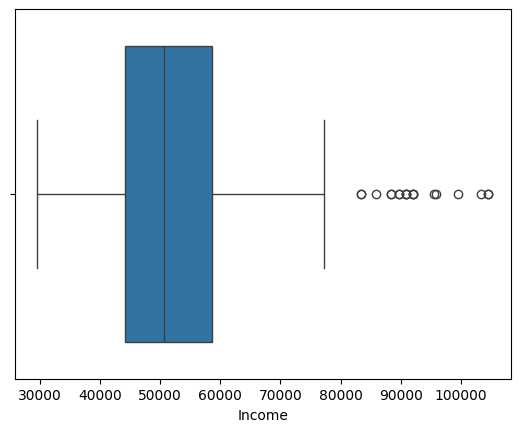

In [20]:
sns.boxplot(data = df['Income'], orient = "h")

##### Clipiing the data between the 5 percentile and 95 percentile

In [21]:
# creating a dataframe that contains all columns contain numeric data types
df_n= df.select_dtypes(include='number')
# creating a dataframe that contains all columns contain non numeric or categorical data types
df_cat = df.select_dtypes(exclude='number')
# Calculateing the 5th and 95th percentiles for each column 
percentiles = df_n.quantile([0.05, 0.95])
# Clip the data between the 5th and 95th percentiles for each column
final_df_n = df_n.apply(lambda x: x.clip(percentiles.loc[0.05, x.name], percentiles.loc[0.95, x.name]), axis=0)

In [22]:
final_df_n.shape

(180, 6)

In [23]:
df_cat.shape

(180, 4)

In [24]:
aerofit_df = pd.concat([df_cat, final_df_n], axis=1)
aerofit_df.shape

(180, 10)

In [25]:
aerofit_df.head()

,Product,Gender,MaritalStatus,Education_category,Age,Education,Usage,Fitness,Income,Miles
0,KP281,Male,Single,Bachelor,20.0,14,3.0,4,34053.15,112
1,KP281,Male,Single,Bachelor,20.0,15,2.0,3,34053.15,75
2,KP281,Female,Partnered,Bachelor,20.0,14,4.0,3,34053.15,66
3,KP281,Male,Single,High school,20.0,14,3.0,3,34053.15,85
4,KP281,Male,Partnered,High school,20.0,14,4.0,2,35247.00,47


In [26]:
aerofit_df.drop(columns=['Education'], inplace = True)

In [27]:
aerofit_df

,Product,Gender,MaritalStatus,Education_category,Age,Usage,Fitness,Income,Miles
0,KP281,Male,Single,Bachelor,20.00,3.00,4,34053.15,112
1,KP281,Male,Single,Bachelor,20.00,2.00,3,34053.15,75
2,KP281,Female,Partnered,Bachelor,20.00,4.00,3,34053.15,66
3,KP281,Male,Single,High school,20.00,3.00,3,34053.15,85
4,KP281,Male,Partnered,High school,20.00,4.00,2,35247.00,47
...,...,...,...,...,...,...,...,...,...
175,KP781,Male,Single,Master,40.00,5.05,5,83416.00,200
176,KP781,Male,Single,Master,42.00,5.00,4,89641.00,200
177,KP781,Male,Single,Bachelor,43.05,5.00,5,90886.00,160
178,KP781,Male,Partnered,Master,43.05,4.00,5,90948.25,120


### Features like marital status, Gender, age and miles have any effect on the product purchased

In [28]:
# products
aerofit_df.Product.unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

#### Count plot between marital status and product purchased

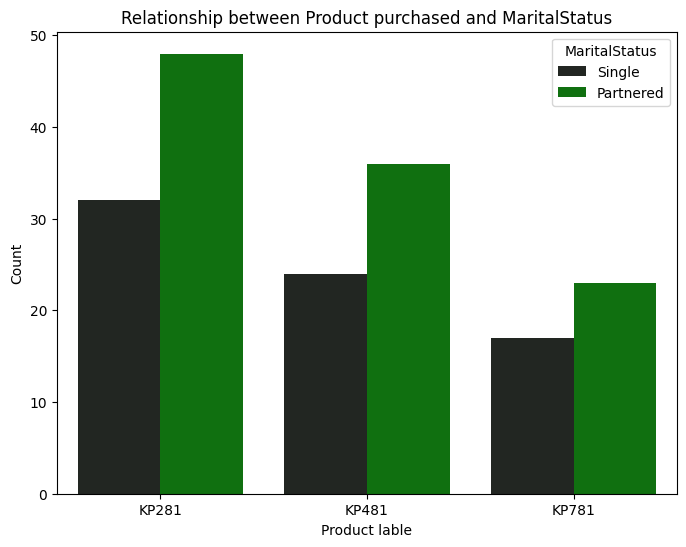

In [29]:
plt.figure(figsize=(8, 6))
sns.countplot(data=aerofit_df, x='Product', hue='MaritalStatus', palette='dark:g')
plt.title('Relationship between Product purchased and MaritalStatus')
plt.xlabel('Product lable')
plt.ylabel('Count')
plt.show()

##### Inference :
> Both single and partnered individuals show a preference for the KP281 treadmill compared to other models.
>
> Partnered individuals are more likely to use or purchase a treadmill than single individuals.

#### Count plot between age and product purchased

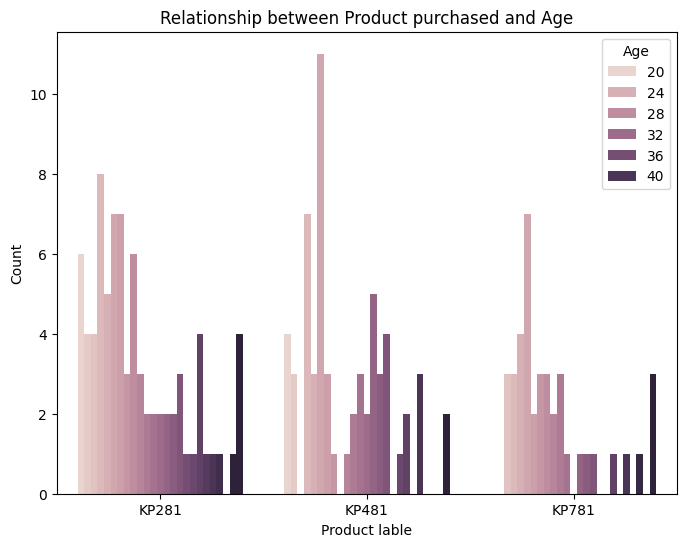

In [30]:
plt.figure(figsize=(8, 6))
sns.countplot(data=aerofit_df, x='Product', hue='Age')
plt.title('Relationship between Product purchased and Age')
plt.xlabel('Product lable')
plt.ylabel('Count')
plt.show()

##### Inference :
> The age group between 24 to 28 years demonstrates higher usage of treadmills compared to other age groups.
> 
> All persons irrespective of their age, they mostly prefers KP281 treadmill.

#### Count plot between gender and product purchased

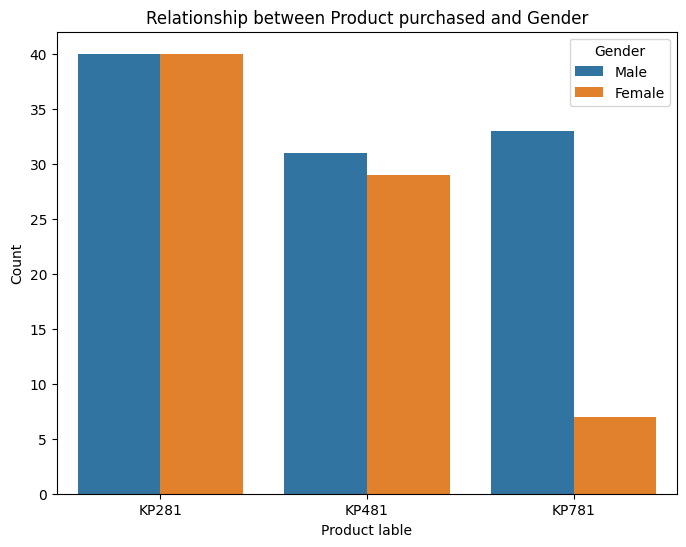

In [31]:
plt.figure(figsize=(8, 6))
sns.countplot(data=aerofit_df, x='Product', hue='Gender')
plt.title('Relationship between Product purchased and Gender')
plt.xlabel('Product lable')
plt.ylabel('Count')
plt.show()

##### Inference :
> Both males and females equally share usage of the KP281 and KP481 treadmills. However, the majority of users for the KP781 treadmill are male

#### Affect of Age and Miles on product purchased

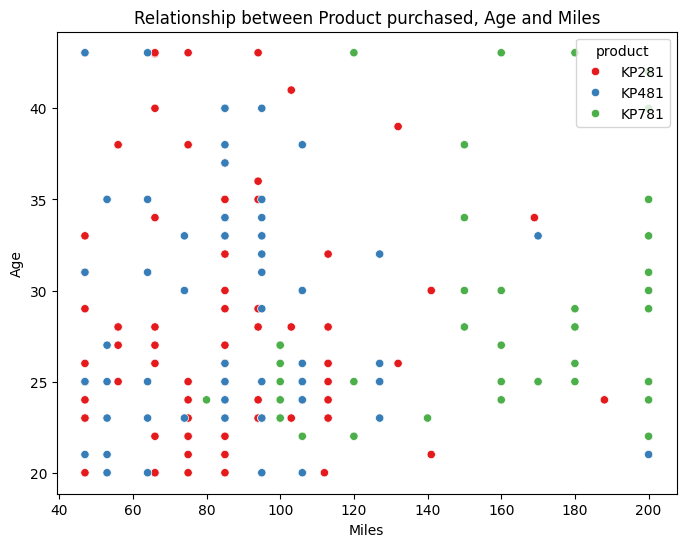

In [32]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=aerofit_df, x='Miles', y='Age', hue='Product', palette='Set1')
plt.title('Relationship between Product purchased, Age and Miles')
plt.xlabel('Miles')
plt.ylabel('Age')
plt.legend(title='product')
plt.show()

##### Inference :
> The scatter plot indicates that the KP781 treadmill is utilized for running or walking over a large range of approximately more than 140 miles.
> 
> The KP481 and KP281 are utilized for running or walking over a less range (up to 140 miles).
>
> The sales of the KP781 product are comparatively lower than those of the other two products.

### Representing the Probability

#### Marginal probability (what percent of customers have purchased KP281, KP481, or KP781)

In [33]:
marginal_prob = aerofit_df['Product'].value_counts(normalize=True)
marginal_prob

Product
KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: proportion, dtype: float64

> The probability of purchasing a KP281 treadmill is 0.44.
>
> The probability of purchasing a KP481 treadmill is 0.33.
>
> The probability of purchasing a KP781 treadmill is 0.22.

#### The probability that the customer buys a product based on each column

In [34]:
# The cross-tab for each combination of product and gender
pd.crosstab(index=aerofit_df['Product'],
            columns=aerofit_df['Gender'],
            margins=True)

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


In [35]:
# The cross-tabulation with probabilities
pd.crosstab(index=aerofit_df['Product'],
            columns=aerofit_df['Gender'],
            margins=True, normalize=True)

Gender,Female,Male,All
Product,,,
KP281,0.222222,0.222222,0.444444
KP481,0.161111,0.172222,0.333333
KP781,0.038889,0.183333,0.222222
All,0.422222,0.577778,1.000000


> For the probability of purchasing the KP281 product, there's a 22.22% chance that the person is female and a 22.22% chance that the person is male. Therefore, collectively, there's a 44.44% chance that the person falls into either of those categories.
>
> For the probability of purchasing the KP481 product, there's a 16.11% chance that the person is female and a 17.22% chance that the person is male. Therefore, collectively, there's a 33.33% chance that the person falls into either of those categories.
>
> For the probability of purchasing the KP781 product, there's a 3.88% chance that the person is female and a 18.33% chance that the person is male. Therefore, collectively, there's a 22.22% chance that the person falls into either of those categories.
>
> The chances of female purchasing a product is 42.22%, chanses of male purchasing a prodcut is 57.77%


In [36]:
# The probabilities for each combination of product and marital status
pd.crosstab(index=aerofit_df['Product'],
            columns=aerofit_df['MaritalStatus'],
            margins=True, normalize = True)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,0.266667,0.177778,0.444444
KP481,0.200000,0.133333,0.333333
KP781,0.127778,0.094444,0.222222
All,0.594444,0.405556,1.000000


> For the probability of purchasing the KP281 product, there's a 26.66% chance that the person is partnered and a 17.77% chance that the person is single. Therefore, collectively, there's a 44.44% chance that the person falls into either of those categories.
>
> For the probability of purchasing the KP481 product, there's a 20% chance that the person is partnered and a 13.33% chance that the person is single. Therefore, collectively, there's a 33.33% chance that the person falls into either of those categories.
>
> For the probability of purchasing the KP781 product, there's a 12.77% chance that the person is partnered and a 9.4% chance that the person is single. Therefore, collectively, there's a 22.22% chance that the person falls into either of those categories
>
> The chances of partnered person purchasing a product is 59.44%, chanses of single person purchasing a prodcut is 40.55%

In [37]:
# The probabilities for each combination of product and educational category
pd.crosstab(index=aerofit_df['Product'],
            columns=aerofit_df['Education_category'],
            margins=True, normalize = True)

Education_category,High school,Bachelor,Master,All
Product,,,,
KP281,0.027778,0.405556,0.011111,0.444444
KP481,0.016667,0.305556,0.011111,0.333333
KP781,0.000000,0.094444,0.127778,0.222222
All,0.044444,0.805556,0.150000,1.000000


In [38]:
aerofit_df['Age'].unique()

array([20.  , 21.  , 22.  , 23.  , 24.  , 25.  , 26.  , 27.  , 28.  ,
       29.  , 30.  , 31.  , 32.  , 33.  , 34.  , 35.  , 36.  , 37.  ,
       38.  , 39.  , 40.  , 41.  , 43.  , 43.05, 42.  ])

In [39]:
bins = [19, 30, 40, 45]
labels = ["Below 30", "Below 40", "Below 50"]
aerofit_df["Age_category"] = pd.cut(aerofit_df['Age'], bins = bins, labels = labels)
aerofit_df.head()


,Product,Gender,MaritalStatus,Education_category,Age,Usage,Fitness,Income,Miles,Age_category
0,KP281,Male,Single,Bachelor,20.0,3.0,4,34053.15,112,Below 30
1,KP281,Male,Single,Bachelor,20.0,2.0,3,34053.15,75,Below 30
2,KP281,Female,Partnered,Bachelor,20.0,4.0,3,34053.15,66,Below 30
3,KP281,Male,Single,High school,20.0,3.0,3,34053.15,85,Below 30
4,KP281,Male,Partnered,High school,20.0,4.0,2,35247.00,47,Below 30


In [40]:
# The probabilities for each combination of product and age category
pd.crosstab(index=aerofit_df['Product'],
            columns=aerofit_df['Age_category'],
            margins=True, normalize = True)

Age_category,Below 30,Below 40,Below 50,All
Product,,,,
KP281,0.305556,0.105556,0.033333,0.444444
KP481,0.194444,0.127778,0.011111,0.333333
KP781,0.166667,0.033333,0.022222,0.222222
All,0.666667,0.266667,0.066667,1.000000


> For the KP281 product: There's a 30.56% chance that the person is below 30 years old, a 10.56% chance that they're below 40, and a 3.33% chance that they're below 50. Collectively, there's a 44.44% chance that they fall into any of these age categories.
>
>For the KP481 product: There's a 19.44% chance that the person is below 30 years old, a 12.78% chance that they're below 40, and a 1.11% chance that they're below 50. Collectively, there's a 33.33% chance that they fall into any of these age categories.
>
> For the KP781 product: There's a 16.67% chance that the person is below 30 years old, a 3.33% chance that they're below 40, and a 2.22% chance that they're below 50. Collectively, there's a 22.22% chance that they fall into any of these age categories.
>
> The chances of person with below 30years purchasing a product is 66.66%, chanses of person having age below 40 years purchasing a prodcut is 26.66%, and chances of person having age above between 40 to 49 years is 6.66%

#### The conditional probability that an event occurs given that another event has occurred

In [41]:
# The cross-tab for each combination of product and gender
pd.crosstab(index=aerofit_df['Product'],
            columns=aerofit_df['Gender'],
            margins=True)

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


The probability of female purchases given that product KP281 has purchased = 40/80 = 0.5,
The probability of male purchases given that product KP281 has purchased = 40/80 =0.5,
The probability of female purchases given that product KP481 has purchased = 29/60 = 0.48,
The probability of male purchases given that product KP481 has purchased = 31/60 = 0.51,
The probability of female purchases given that product KP781 has purchased = 7/40 = 0.17,
The probability of male purchases given that product KP781 has purchased = 33/40 = 0.82.
The below following code will represent these values


In [42]:
# The cross-tabulation with probabilities given that particular product has purchased
pd.crosstab(index=aerofit_df['Product'],
            columns=aerofit_df['Gender'],
            margins=True, normalize='index')

Gender,Female,Male
Product,,
KP281,0.500000,0.500000
KP481,0.483333,0.516667
KP781,0.175000,0.825000
All,0.422222,0.577778


> For product KP281, the gender distribution is evenly split, with 50% female and 50% male users.
> 
> For product KP481, there are slightly more male users (51.67%) compared to female users (48.33%).
> 
> For product KP781, there's a significant difference, with only 17.5% female users and 82.5% male users.
> 
> Overall, across all products, the user base is predominantly male, with 57.78% male users compared to 42.22% female users.





In [43]:
# The cross-tab for each combination of product and gender
pd.crosstab(index=aerofit_df['Product'],
            columns=aerofit_df['Gender'],
            margins=True)

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


The probability of product KP281 purchases given that female has purchased = 40/76 = 0.52,
The probability of product KP281  purchases given that male has purchased = 40/104 =0.38,
The probability of product KP481 purchases given that female has purchased = 29/76 = 0.38,
The probability of product KP481 purchases given that male has purchased = 31/104 = 0.29,
The probability of product KP781 purchases given that female has purchased = 7/76 = 0.09,
The probability of male purchases given that product KP781 has purchased = 33/104 = 0.31.
The below following code will represent these values

In [44]:
# The cross-tabulation with probabilities given that particular Gender has purchased
pd.crosstab(index=aerofit_df['Gender'],
            columns=aerofit_df['Product'],
            margins=True, normalize='index')

Product,KP281,KP481,KP781
Gender,,,
Female,0.526316,0.381579,0.092105
Male,0.384615,0.298077,0.317308
All,0.444444,0.333333,0.222222


> For product KP281, 52.63% of users are female, and 38.46% are male.
>
> For product KP481, 38.16% of users are female, and 29.81% are male.
>
> For product KP781, there's a significant difference in gender distribution, with only 9.21% female users and 31.73% male users.
>
> The females (52.63%) and males(38.4%) most preferable treadmill is KP281.

In [45]:
# The cross-tabulation with probabilities given that the particular product has purchased
pd.crosstab(index=aerofit_df['Product'],
            columns=aerofit_df['MaritalStatus'],
            margins=True, normalize = 'index')

MaritalStatus,Partnered,Single
Product,,
KP281,0.600000,0.400000
KP481,0.600000,0.400000
KP781,0.575000,0.425000
All,0.594444,0.405556


> For the KP281 product: There's a 60% chance that the person is partnered and a 40% chance that they're single.
>
> For the KP481 product:There's a 60% chance that the person is partnered and a 40% chance that they're single.
>
> For the KP781 product: There's a 57.5% chance that the person is partnered and a 42.5% chance that they're single.
These probabilities are based on the provided data.

> The likelihood of purchasing a treadmill is higher for individuals in relationships compared to those who are single.



In [46]:
# The cross-tabulation with probabilities given that the person with particular maritalstatus
pd.crosstab(index=aerofit_df['MaritalStatus'],
            columns=aerofit_df['Product'],
            margins=True, normalize = 'index')

Product,KP281,KP481,KP781
MaritalStatus,,,
Partnered,0.448598,0.336449,0.214953
Single,0.438356,0.328767,0.232877
All,0.444444,0.333333,0.222222


> For product KP281, 44.86% of partnered individuals and 43.84% of single individuals use it.
>
> For product KP481, 33.64% of partnered individuals and 32.88% of single individuals use it.
>
> For product KP781, 21.50% of partnered individuals and 23.29% of single individuals use it.
>
> Partnered and single individuvals uses more KP281 treadmill than rest two treadmills.

In [47]:
# The cross-tabulation with probabilities given that the particular product has purchased
pd.crosstab(index=aerofit_df['Product'],
            columns=aerofit_df['Education_category'],
            margins=True, normalize = 'index')

Education_category,High school,Bachelor,Master
Product,,,
KP281,0.062500,0.912500,0.025000
KP481,0.050000,0.916667,0.033333
KP781,0.000000,0.425000,0.575000
All,0.044444,0.805556,0.150000


> For product KP281, 6.25% of users have a high school education, 91.25% have a bachelor's degree, and 2.5% have a master's degree.
>
> For product KP481, 5% of users have a high school education, 91.67% have a bachelor's degree, and 3.33% have a master's degree.
>
> For product KP781, there are no users with a high school education, 42.5% have a bachelor's degree, and 57.5% have a master's degree.
>
> Looking at the overall percentages:4.44% of users have a high school education,80.56% have a bachelor's degree and 15% have a master's degree.
>
> The probability of using KP281 and KP481 is higher for persons with a bachelor's degree, while KP781 is more commonly used by those with a master's degree.

In [48]:
# The cross-tabulation with probabilities  given that the person belongs to particular educational category
pd.crosstab(index=aerofit_df['Education_category'],
            columns=aerofit_df['Product'],
            margins=True, normalize = 'index')

Product,KP281,KP481,KP781
Education_category,,,
High school,0.625000,0.375000,0.000000
Bachelor,0.503448,0.379310,0.117241
Master,0.074074,0.074074,0.851852
All,0.444444,0.333333,0.222222


> KP281:Among users with a high school education, 62.5% use KP281.
> Among users with a bachelor's degree, 50.34% use KP281.
> Among users with a master's degree, 7.41% use KP281.
> Overall, 44.44% of all users use KP281.
> 
>KP481:Among users with a high school education, 37.5% use KP481.
Among users with a bachelor's degree, 37.93% use KP481.
Among users with a master's degree, 7.41% use KP481.
Overall, 33.33% of all users use KP481.
> 
>KP781:Among users with a high school education, none use KP781.
Among users with a bachelor's degree, 11.72% use KP781.
Among users with a master's degree, 85.19% use KP781.
Overall, 22.22% of all users use KP781.
>
> KP281 and KP481 are more commonly used by persons with bachelor's degrees.
>
> KP781 is predominantly utilized by persons with master's degrees.

In [49]:
# The cross-tabulation with probabilities given that the specific product purchased
pd.crosstab(index=aerofit_df['Product'],
            columns=aerofit_df['Age_category'],
            margins=True, normalize = 'index')

Age_category,Below 30,Below 40,Below 50
Product,,,
KP281,0.687500,0.237500,0.075000
KP481,0.583333,0.383333,0.033333
KP781,0.750000,0.150000,0.100000
All,0.666667,0.266667,0.066667


> KP281 is more popular among users below 30 years old.
>
> KP781 is more evenly distributed across age categories, but it's relatively more popular among users below 30 years old compared to other age groups.

In [50]:
# The cross-tabulation with probabilities given that the person belongs to specific age category
pd.crosstab(index=aerofit_df['Age_category'],
            columns=aerofit_df['Product'],
            margins=True, normalize = 'index')

Product,KP281,KP481,KP781
Age_category,,,
Below 30,0.458333,0.291667,0.250000
Below 40,0.395833,0.479167,0.125000
Below 50,0.500000,0.166667,0.333333
All,0.444444,0.333333,0.222222


> KP281 is relatively popular among all users.
>
> KP481 is more popular among users below 40 years old.
>
> KP781 has a relatively higher usage among users age between 40 to 49 years old compared to other age groups.

### Checking the correlation among different factors

In [51]:
# Creating a new dataframe which has only columns with numeric datatypes, further this can be used to find the correlation between different factors
aerofit_v_col = aerofit_df[['Age','Usage', 'Fitness', 'Income', 'Miles']]
aerofit_v_df = pd.DataFrame(aerofit_v_col)
aerofit_v_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Age      180 non-null    float64
 1   Usage    180 non-null    float64
 2   Fitness  180 non-null    int64  
 3   Income   180 non-null    float64
 4   Miles    180 non-null    int64  
dtypes: float64(3), int64(2)
memory usage: 7.2 KB


In [52]:
aerofit_v_df['Fitness'] = aerofit_v_df['Fitness'].astype(float)
aerofit_v_df['Miles'] = aerofit_v_df['Miles'].astype(float)

In [53]:
# Compute the correlation matrix
correlation_matrix = aerofit_v_df.corr()

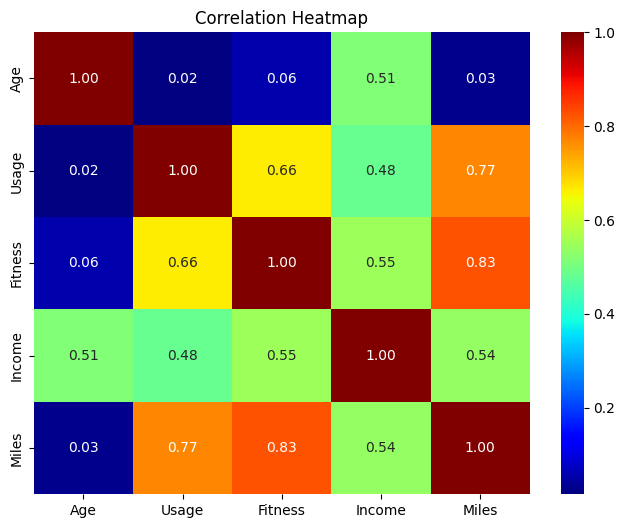

In [54]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='jet', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

#### Inference:
> A correlation coefficient of 0.83 between miles and fitness indicates a strong positive linear relationship between these two variables.As the expected miles customers are willing to run increases, their fitness levels also tend to increase. When customers expect to run more miles on the product, they tend to have higher fitness levels. This could imply that customers who have higher fitness levels are more likely to run/walk for more miles.
> 
> Correlation between usage and miles is 0.77 that as usage increases, miles tend to increase as well, and vice versa.tThe correlation of 0.66 between fitness and usage indicates that there is a tendency for higher levels of fitness to be associated with higher levels of usage, and vice versa.The correlation does not imply causation. While increased product usage may contribute to improved fitness levels (e.g., using fitness equipment more often leads to better physical health), it's also possible that people with higher fitness levels are more inclined to use certain products or engage in certain activities more frequently.
>
> A correlation coefficient of 0.55 between income and fitness suggests a moderate positive relationship between the two variables. This means that, on average, as income increases, fitness levels also tend to increase.
>
> A correlation coefficient of 0.03 between age and miles suggests a very weak or negligible linear relationship between the two variables.It indicates that as one variable (age) increases or decreases, the other variable (miles) doesn't consistently change in any particular direction.Similarly correlation between age and usage is 0.02, it indicates that the age changes, usage does not consistently increase or decrease in any particular direction.





### Customer profiling and recommendation

In [55]:
# To profile customers for each product, we can aggregate information based on the product they purchased
# Grouping by Product and aggregating statistics
product_profiles = aerofit_df.groupby('Product').agg({
    'Gender': pd.Series.mode,
    'MaritalStatus': pd.Series.mode,
    'Education_category': pd.Series.mode,
    'Age': 'mean',
    'Usage': 'mean',
    'Fitness': 'mean',
    'Income': 'mean',
    'Miles': 'mean',
    'Age_category': pd.Series.mode
})

product_profiles

,Gender,MaritalStatus,Education_category,Age,Usage,Fitness,Income,Miles,Age_category
Product,,,,,,,,,
KP281,"[Female, Male]",Partnered,Bachelor,28.427500,3.087500,2.975000,46584.31125,83.125,Below 30
KP481,Male,Partnered,Bachelor,28.801667,3.066667,2.916667,49046.60750,88.500,Below 30
KP781,Male,Partnered,Master,28.828750,4.511250,4.625000,73908.28125,155.900,Below 30



Each row represents a customer along with their characteristics and the product they purchased.
statistics for each product such as the most common gender, marital status, education category, average age, average usage, average fitness level, average income, average expected miles, and the most common age category.

For product KP281:

Gender: Female, Male (indicating both genders purchase this product);
MaritalStatus: Partnered;
Education_category: Bachelor;
Age: Average age of customers: 28.4275;
Usage: Average usage frequency: 3.0875;
Fitness: Average fitness level: 2.975;
Income: Average income level: $46,584.31;
Miles: Average expected miles: 83.125;
Age_category: Below 30.

For product KP481:

Gender: Male;
MaritalStatus: Partnered;
Education_category: Bachelor;
Age: Average age of customers: 28.801667;
Usage: Average usage frequency: 3.066667;
Fitness: Average fitness level: 2.916667;
Income: Average income level: $49,046.61;
Miles: Average expected miles: 88.5;
Age_category: Below 30.

For product KP781:

Gender: Male;
MaritalStatus: Partnered;
Education_category: Master;
Age: Average age of customers: 28.82875;
Usage: Average usage frequency: 4.51125;
Fitness: Average fitness level: 4.625;
Income: Average income level: $73,908.28;
Miles: Average expected miles: 155.9;
Age_category: Below 30.

#### Inference and Recommendatios:
##### Gender and Marital Status:

> Products KP281 seem to appeal to both genders, as they have customers from both genders. However, KP481 and KP781 seems to attract mostly male customers.
> All three products have a significant proportion of partnered customers, indicating potential marketing opportunities targeting couples or families.

##### Education Category:

> The majority of customers for KP281 and KP481 have a Bachelor's degree, while for KP781, customers have higher education levels, with most having a Master's degree.
> This suggests that KP781 may be positioned as a premium or advanced product.

###### Age Category:

> The average age of customers for all products is below 30, indicating a younger target demographic.
> Given that the average age falls below 30 and the products are fitness-related, targeting younger demographics with fitness-related content or promotions could be effective.

##### Usage and Fitness:

> Customers using KP781 have a higher average usage frequency and fitness level compared to the other products. This suggests that KP781 may be more tailored towards serious fitness enthusiasts or athletes.
> For KP281 and KP481, focusing on promoting the fitness benefits and encouraging regular usage could help increase customer engagement and loyalty.

##### Income:

> Customers purchasing KP781 have a significantly higher average income compared to those purchasing KP281 and KP481. This indicates that KP781 may be perceived as a premium product and could command higher prices or offer premium features.
> Offering flexible pricing options or installment plans could make KP781 more accessible to customers with lower incomes.

##### Expected Miles:

> Customers purchasing KP781 expect to run significantly more miles compared to customers of KP281 and KP481. This could indicate that KP781 is marketed towards customers with higher fitness goals or endurance training needs.
> Marketing campaigns highlighting the durability and performance of KP781 for long-distance running or endurance training could resonate well with customers.
